# Regressões

Regressão Linear pelo método dos mínimos quadrados é criada a partir do LinearRegression no Scikit-Learn

Esse método busca a curva que minimiza a função de custo para o MSE 

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2
$$

onde:
- \( $n$ \) é o número total de observações,
- \( $\hat{y}_i$ \) é o valor previsto,
- \( $y_i$ \) é o valor real.

In [1]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100, 1)

In [2]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [3]:
lin_reg.intercept_

array([4.48362314])

In [4]:
lin_reg.coef_

array([[2.99751334]])

In [5]:
x_novo = np.array([[0], [2]])
lin_reg.predict(x_novo)

array([[ 4.48362314],
       [10.47864983]])

In [6]:
lin_reg.score(X, y) # R²

0.9697922906609765

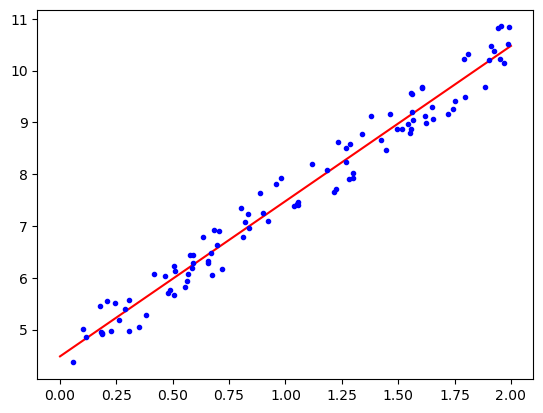

In [7]:
import matplotlib.pyplot as plt

plt.plot(x_novo, lin_reg.predict(x_novo), 'r-')
plt.plot(X, y, 'b.')
plt.show()

## Regressão pelo método GD (Gradiente Descendente)

é um método cuja ideia é ir ajustando o parâmetro, em uma inicialização aleatória, e vai diminuindo consecutivamente até encontrar o gradiente zero, ou o mínimo de erro.

Ou seja, com uma inicialização aleatória, o modelo vai diminuindo gradativamente, conforme a taxa de aprendizado escolhida, parâmetro na função de custo até que seu valor seja zero (gradiente) ou seja, mínimo.

Taxas de aprendizado muito alta podem acabar passando do ponto mínimo e não alcançar o melhor ponto, e taxas muito baixas aumentam a necessidade computacional do modelo

É um método que, na função de custo, se calcula a derivada de cada ponto de tangência e com isso a variação do ponto até alcalçar seu mínimo

###  - **Gradiente Descendente em batch**

Para a seu uso, precisamos calcular quanto se altera a função de custo com as pequenas alterações do parâmetro. O que chamamos de derivadas parciais

$$
\vec{\nabla}_{\text{MSE}}(\vec{\theta}) = \frac{2}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i) \vec{x}_i
$$

onde:
- \( $n$ \) é o número total de observações,
- \( $\hat{y}_i$ \) é o valor previsto,
- \( $y_i$ \) é o valor real,
- \( $\vec{x}_i$ \) é o vetor de características da \($i$\)-ésima observação,
- \( $\vec{\theta}$ \) são os parâmetros do modelo.

A próxima etapa, seria subtrair a taxa de aprendizado $\alpha$ de cada iteração 

$$
\vec{\theta} = \vec{\theta} - \alpha \vec{\nabla}_{\text{MSE}}(\vec{\theta})
$$

onde:
- \($\vec{\theta}$) são os parâmetros do modelo,
- \($\alpha$) é a taxa de aprendizado,
- \($\vec{\nabla}_{\text{MSE}}(\vec{\theta})$) é o vetor gradiente da função de custo MSE.


***A taxa de aprendizado $\alpha$ quando muito pequena pode acabar demorando muito para encontrar o ponto mínimo e quando muito alta pode acabar não chegando no resultado e atingindo platôs altos, para evitar use o GridSearchCV***

***O mesmo se segue para a quantidade de iterações, caso muito pequeno pode-se nunca chegar no gradiente zero e caso muito alto, perca tempo esperando um tempo exagerado, para encontrar um bom valor basta escolher um alto valor e interromper quando o vetor gradiente se tornar pequeno, ou a constante $e$ for irrisória***


###  - **Gradiente Descendente Estocástico**

O gradiente estocástico, ao contrário do batch, faz iterações e busca o mínimo vetor gradiente em instâncias aleatórias do conjunto.

Esse método tem como vantagem de ser menos pecaminoso quanto a complexidade computacional e ser mais rápido para conjunto de dados maiores, porém por sua natureza estocástica, aleatória, o algoritmo é menos regular

Porém é de grande ajuda quando a função de custo é irregular (ao invés de uma tigelar ela possuí subidas, descidas, declives, etc. Ou seja, busca-se o mínimo global) esse modo é preferível pois tende a escapar dos mínimos globais. O dilema desse método, entretanto, é reduzir **gradualmente** a taxa de aprendizado. As etapas começam em uma escala maior para pular o mínimo local e vai reduzindo gradualmente. 

No entanto, o SGD enfrenta o dilema de ajustar a taxa de aprendizado. É essencial reduzir gradualmente a taxa de aprendizado. As etapas começam em uma escala maior, permitindo que o algoritmo pule sobre mínimos locais, e vai reduzindo gradualmente para uma convergência mais precisa.

Se a taxa de aprendizado reduzir muito rápido, o algoritmo pode ficar empacado em um mínimo local. Por outro lado, se a redução for muito lenta, o algoritmo pode interromper o treinamento cedo demais, antes de encontrar o mínimo global. Portanto, o ajuste adequado da taxa de aprendizado é crucial para o sucesso do SGD.

### Batch

In [8]:
eta = 0.1 #taxa de aprendizado
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

X = 2 * np.random.rand(100,1)
y = 4 +3 * X + np.random.randn(100,1)

x_b = np.c_[np.ones((100,1)), X]

theta = np.random.rand(2,1)

for iterac in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients

In [9]:
theta #params que minimizam o gradiente

array([[4.10317807],
       [2.98021596]])

### Estocástico

In [10]:
from sklearn.linear_model import SGDRegressor

#modelo sem regularização, penalty = None, roda 1000 iterações (max_iter) 
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.09814394]), array([2.98262707]))

## Regressão Polinomial

Casos dados fujam de uma relação linear ou sejam complexos, um bom método de abordagem é adicionando polinomios à reta (às features), mas entende-se que quanto mais polinômios se adicione, maior a probabilidade sobreajuste (overfitting) do modelo

Os métodos para avaliar esse sobreajuste, como discutido antes, é não só analisar o RMSE como efetuar uma validação cruzada e avaliar o scores ou até analisar as curvas de aprendizado dos modelos

Um bom trabalho com Regressões Polinomias é avaliar o trade/off de viés e variãncia

Em ML se diz que falhas em generalizações se provém de três grandes variáveis:

- *Viés* : Refere-se às suposições erradas feitas pelo modelo, como assumir que a relação entre as variáveis é linear ou que a distribuição dos dados é normal. Escolher um modelo inadequado ou não complexo o suficiente pode resultar em um viés alto, levando a um desempenho ruim.

- *Variância* : Quanto maior a sensibilidade do modelo às variações dos dados de treinamento, maior a chance de overfitting. Modelos muito complexos têm um alto grau de variância, o que pode prejudicar a capacidade de generalização para novos dados.

- *Erro Irredutível* : Este é o ruído presente nos dados, como outliers e valores NaN, que não podem ser eliminados mesmo com o melhor modelo.

Normalmente, aumentar a complexidade do modelo aumenta a variância, enquanto diminuir a complexidade aumenta o viés. O objetivo é encontrar um equilíbrio adequado entre esses dois fatores, ou seja, um trade-off entre viés e variância.

Para determinar o melhor grau do polinômio e as penalidades eficientes para o modelo, podem ser utilizados métodos como regularização (Ridge, Lasso) que ajudam a controlar a complexidade e a variância do modelo, promovendo uma melhor generalização.

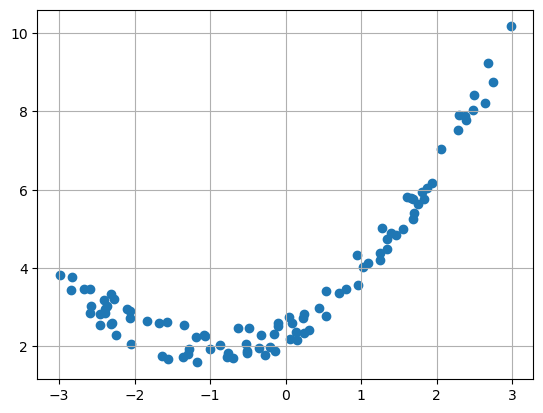

In [11]:
m = 100
x = 6 * np.random.rand(m,1)  - 3
y = 0.5 * x**2 + x + 2 + np.random.rand(m,1)

plt.scatter(x, y)
plt.grid(True)
plt.show()

In [12]:
# A forma de adicionar polinômios é através do PolynomialFeatures do sklearn

from sklearn.preprocessing import PolynomialFeatures

var_polinomiais = PolynomialFeatures(degree=2, include_bias=False) #degrees é o polinômio desejado

x_poly = var_polinomiais.fit_transform(x) #adicionamos a cada instância de x um valor quadrático do valor original

x[0], x_poly[0]

(array([0.70954905]), array([0.70954905, 0.50345986]))

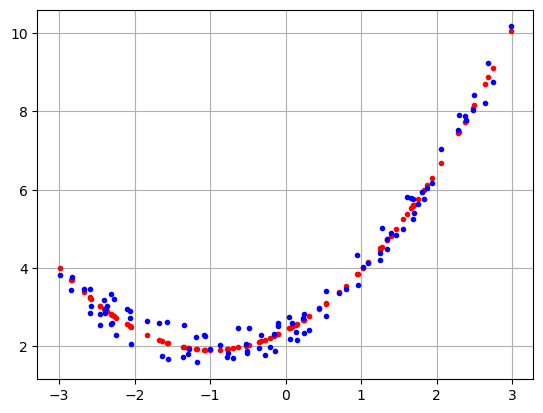

In [13]:
poly_reg = LinearRegression()
poly_reg.fit(x_poly, y)


plt.plot(x, poly_reg.predict(x_poly), 'r.')
plt.plot(x, y, 'b.')
plt.grid(True)
plt.show()

## Regressões GLM e Quantilica

- Regressões GLM (Modelos Lineares Generalizados)

Os Modelos Lineares Generalizados (GLM) são utilizados quando a variável target não segue uma distribuição normal ou quando lidamos com dados de contagem.

- Regressão de Poisson: 

Para variáveis target de contagem (variáveis quantitativas discretas), recomenda-se uma Regressão de Poisson com um log-link. Este tipo de regressão é apropriado para modelar a relação entre uma variável dependente de contagem e uma ou mais variáveis independentes.

- Regressão Gamma

Quando os dados são positivos, mas apresentam uma cauda achatada, recomenda-se uma Regressão Gamma com um log-link. Este modelo é adequado para variáveis contínuas positivas que possuem variância proporcional ao quadrado da média.

- Regressão com Distribuição Gaussiana Inversa

Para dados que possuem uma cauda mais pesada do que a de uma distribuição Gamma, pode-se utilizar uma Regressão com Distribuição Gaussiana Inversa. Este modelo é adequado para variáveis contínuas positivas com uma distribuição assimétrica e caudas pesadas.

- Regressão Quantílica

A Regressão Quantílica é útil quando se lida com outliers que não puderam ser removidos ou tratados, ou com distribuições mais dispersas nas extremidades - heterocedasticidade - (ou semelhantes à distribuição de Pareto). Ao invés de modelar a média condicional da variável dependente, a regressão quantílica permite modelar quantis específicos, fornecendo uma visão mais completa da relação entre as variáveis independentes e a variável dependente

### GLM

In [14]:
from sklearn.linear_model import TweedieRegressor #exemplo do próprio Scuikit-Learn
reg = TweedieRegressor(power=1, alpha=0.5, link='log') #power 1 = Poisson., power 2 = Gamma, power 3 = Inverse Gaussian #link = log
reg.fit([[0, 0], [0, 1], [2, 2]], [0, 1, 2])
TweedieRegressor(alpha=0.5, link='log', power=1)
reg.coef_, reg.intercept_

(array([0.24631611, 0.43370317]), -0.7638091359123443)

### Quantilica

In [15]:
rng = np.random.RandomState(42)
x = np.linspace(start=0, stop=10, num=100)
X = x[:, np.newaxis]
y_true_mean = 10 + 0.5 * x

in the first case, a heteroscedastic Normal noise is added;

in the second case, an asymmetric Pareto noise is added.

In [16]:
y_normal = y_true_mean + rng.normal(loc=0, scale=0.5 + 0.5 * x, size=x.shape[0])
a = 5
y_pareto = y_true_mean + 10 * (rng.pareto(a, size=x.shape[0]) - 1 / (a - 1))

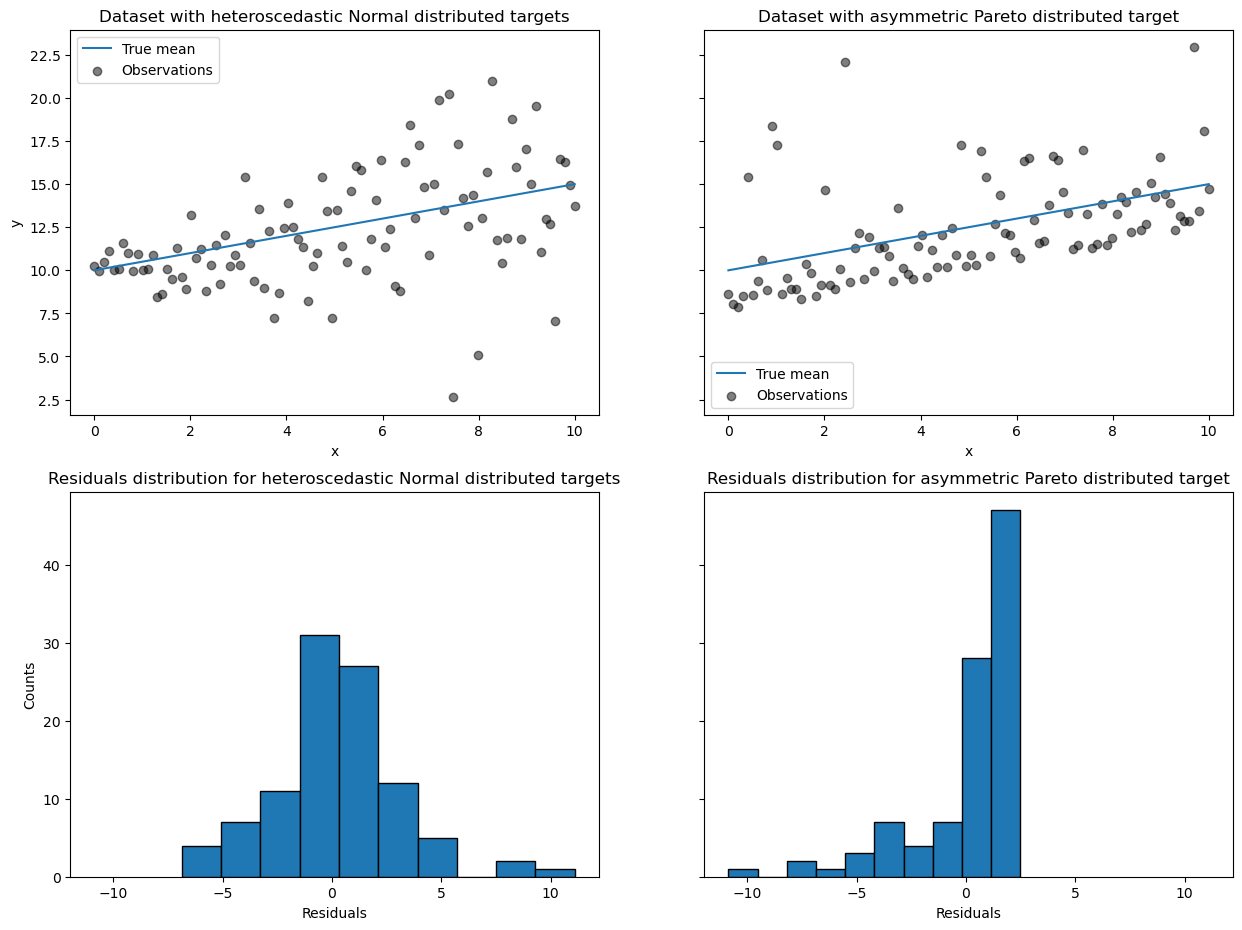

In [17]:
_, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 11), sharex="row", sharey="row")

axs[0, 0].plot(x, y_true_mean, label="True mean")
axs[0, 0].scatter(x, y_normal, color="black", alpha=0.5, label="Observations")
axs[1, 0].hist(y_true_mean - y_normal, edgecolor="black")


axs[0, 1].plot(x, y_true_mean, label="True mean")
axs[0, 1].scatter(x, y_pareto, color="black", alpha=0.5, label="Observations")
axs[1, 1].hist(y_true_mean - y_pareto, edgecolor="black")

axs[0, 0].set_title("Dataset with heteroscedastic Normal distributed targets")
axs[0, 1].set_title("Dataset with asymmetric Pareto distributed target")
axs[1, 0].set_title(
    "Residuals distribution for heteroscedastic Normal distributed targets"
)
axs[1, 1].set_title("Residuals distribution for asymmetric Pareto distributed target")
axs[0, 0].legend()
axs[0, 1].legend()
axs[0, 0].set_ylabel("y")
axs[1, 0].set_ylabel("Counts")
axs[0, 1].set_xlabel("x")
axs[0, 0].set_xlabel("x")
axs[1, 0].set_xlabel("Residuals")
_ = axs[1, 1].set_xlabel("Residuals")

O exemplo do sklearn acima demostra como os dados estão, tanto com heterocedasticidade do lado esquerdo, perceba como os dados se tornam mais dispersos na ponta e do lado direito como os dados se aproximam de um pareto

In [18]:
from sklearn.utils.fixes import parse_version, sp_version #por erros de incompatibilidade, o sklearn nos obriga" a adicionar um solver específico
# This is line is to avoid incompatibility if older SciPy version.
# You should use `solver="highs"` with recent version of SciPy.
solver = "highs" if sp_version >= parse_version("1.6.0") else "interior-point"

In [19]:
from sklearn.linear_model import QuantileRegressor

quantiles = [0.05, 0.5, 0.95] # para criar diversas curvas, vamos analisar alguns quantis (como pede o sklearn)
predictions = {}
out_bounds_predictions = np.zeros_like(y_true_mean, dtype=np.bool_)
for quantile in quantiles:
    qr = QuantileRegressor(quantile=quantile, alpha=0, solver=solver) #aqui chamamos o solver
    y_pred = qr.fit(X, y_normal).predict(X)
    predictions[quantile] = y_pred

    if quantile == min(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred >= y_normal
        )
    elif quantile == max(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred <= y_normal
        )

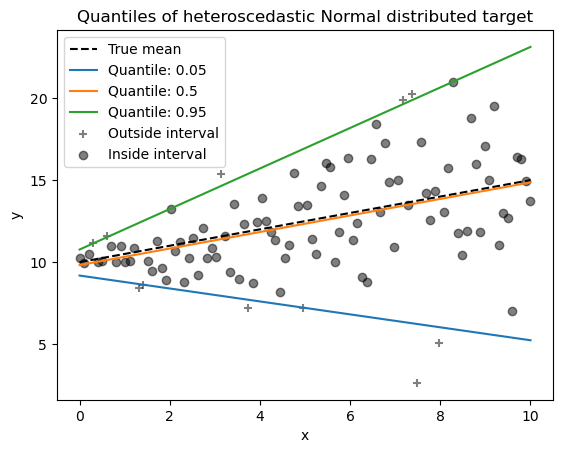

In [20]:
plt.plot(X, y_true_mean, color="black", linestyle="dashed", label="True mean")

for quantile, y_pred in predictions.items():
    plt.plot(X, y_pred, label=f"Quantile: {quantile}")

plt.scatter(
    x[out_bounds_predictions],
    y_normal[out_bounds_predictions],
    color="black",
    marker="+",
    alpha=0.5,
    label="Outside interval",
)
plt.scatter(
    x[~out_bounds_predictions],
    y_normal[~out_bounds_predictions],
    color="black",
    alpha=0.5,
    label="Inside interval",
)

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
_ = plt.title("Quantiles of heteroscedastic Normal distributed target")

# Regularização de Regressões

A melhor forma de resolver problemas de sobreajuste das regressões seria adicionar algumas pesos ao modelo, como regularizações Ridge, Lasso e Elastic Net.

- ### **Regressão Ridge  - L2**

Na regressão de Ridge um peso é adicionado a função de custo. Isso faz com que o modelo escolher a função com menor peso e ajusta os dados.

Ou seja, se adicona um termo de regularização dado por:

$$
\text{L2} = \lambda \sum_{j=1}^{m} \theta_j^2
$$

onde:
- \( $\lambda$ \) é o parâmetro de regularização,
- \( $\theta_j$ \) são os coeficientes do modelo,
- \( $m$ \) é o número total de coeficientes do modelo (excluindo o intercepto).

Função de custo da regressão de Ridge:

$$
J(\vec{\theta}) = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2 + \lambda \sum_{j=1}^{m} \theta_j^2
$$

onde:
- \( $n$ \) é o número total de observações,
- \( $\hat{y}_i$ \) é o valor previsto,
- \( $y_i$ \) é o valor real,
- \( $\lambda$ \) é o parâmetro de regularização,
- \( $\theta_j$ \) são os coeficientes do modelo,
- \( $m$ \) é o número total de coeficientes do modelo (excluindo o intercepto).

Se $\alpha$ for muito grande todos os pesos acabarão muito próximos de zero e resultará em uma linha achatada que passa pela média


#### ***A regressão de Ridge recomenda que os dados sejam escalonados antes de sua aplicação***


A correção L2 é recomendada quando dados apresentam **multicolinearidade**, em dados com **muitas features e poucas amostras** e/ou modelos onde todas as **features importam**


- ### **Regressão Lasso - L1**

Uma regressão útil para quando acredita-se que há algumas features pouco importantes, que não farão efeitos, ou features com multicolinearidade que precisam ser consideradas

A regressão de Lasso também adiciona um termo de peso, mas dessa vez um termo L1, do vetor do peso, dado por:

$$
\text{L1} = \lambda \sum_{j=1}^{m} |\theta_j|
$$

onde:
- \( $\lambda$ \) é o parâmetro de regularização,
- \( $\theta_j$ \) são os coeficientes do modelo,
- \( $m$ \) é o número total de coeficientes do modelo (excluindo o intercepto).

A característica peculiar da regularização Lasso é que seu peso tende a suprimir características menos importantes do modelo

A função de custo da Regressão de Laço é dado por:

$$
J(\vec{\theta}) = \frac{1}{2n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2 + \lambda \sum_{j=1}^{m} |\theta_j|
$$

onde:
- \( $n$ \) é o número total de observações,
- \( $\hat{y}_i$ \) é o valor previsto,
- \( $y_i$ \) é o valor real,
- \( $\lambda$ \) é o parâmetro de regularização,
- \( $\theta_j$ \) são os coeficientes do modelo,
- \( $m$ \) é o número total de coeficientes do modelo (excluindo o intercepto).




#### **Nas funções do sklearn controle $\alpha$ para um Trade-off entre Viés e Variância - Use GridSearch ou validação cruzada para encontrar o melhor valor**

#### ***Um $\alpha$ maior indica maior viés***

#### ***Um $\alpha$ menor indica maior variãncia***

In [21]:
from sklearn.linear_model import Ridge

rid_reg = Ridge(alpha=	1, solver='cholesky')
rid_reg.fit(X, y)

rid_reg.predict([[1.5]])

array([[3.69608955]])

In [22]:
sgd_rid = SGDRegressor(penalty='l2')
sgd_rid.fit(X,y.ravel())
sgd_rid.predict([[1.5]])

array([3.25870245])

#### Lasso em Regressão MQO

In [23]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([3.71546897])

#### Lasso Regressões SGD

In [24]:
sgd_rid = SGDRegressor(penalty='l1')
sgd_rid.fit(X,y.ravel())
sgd_rid.predict([[1.5]])

array([3.17473041])

# Elastic Net

### Elastic Net é uma regularização que une L1 e L2 onde a relação é controlado por um termo $r$

Função de custo de Elastic Net é dado por:

$$
J(\vec{\theta}) = \frac{1}{2n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2 + \lambda_1 \sum_{j=1}^{m} |\theta_j| + \lambda_2 \sum_{j=1}^{m} \theta_j^2
$$

onde:
- \( $n$ \) é o número total de observações,
- \( $\hat{y}_i$ \) é o valor previsto,
- \( $y_i$ \) é o valor real,
- \( $\lambda_1$ \) é o parâmetro de regularização L1,
- \( $\lambda_2$ \) é o parâmetro de regularização L2,
- \( $\theta_j$ \) são os coeficientes do modelo,
- \( $m$ \) é o número total de coeficientes do modelo (excluindo o intercepto).

***Comumente é recomendado o uso da Regressão de Ridge, porém caso acredite que tenham features que não são importantes, a Lasso ou Elastic Net são as mais recomendadas, sendo a Elastic Net mais recomendado.***

Você pode achar o melhor valor de l1_ratio usando o GridSearch

In [25]:
from sklearn.linear_model import ElasticNet

elastic_reg = ElasticNet(alpha = 0.1, l1_ratio=0.5) #l1_ratio 0.5 significa a correlação entre L1 e L2

elastic_reg.fit(X,y)

elastic_reg.predict([[1.5]])

array([3.71546897])

# Regressão Logística

Regressão para classificação - Chamamos a regressão logística de classificador binário

Usada para prever a probabilidade de uma instância, ou mais, pertencer a uma classe (target) específico

Caso a probabilidade seja maior que 0.5 se diz que faz parte da classe (classe positiva 1), caso menor, dizemos que não pertence (classe negativa 0)

$$
J(\vec{\theta}) = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

onde:
- \( $n$ \) é o número total de observações,
- \( $y_i$ \) é o valor real da \($i$\)-ésima observação (0 ou 1),
- \( $\hat{y}_i$ \) é a probabilidade prevista pelo modelo para a \(i\)-ésima observação, dada por \( $\hat{y}_i = \sigma(\vec{\theta} \cdot \vec{x}_i)$ \),
- \( $\sigma$ \) é a função sigmoide, definida como \( $\sigma(z) = \frac{1}{1 + e^{-z}}$ \),
- \( $\vec{x}_i$ \) é o vetor de características da \($i$\)-ésima observação,
- \( $\vec{\theta}$ \) são os parâmetros do modelo.

A função sigmoide mapeia os valores previstos para o intervalo (0, 1), o que os torna interpretáveis como probabilidades.

Assim, a função de custo da regressão logística mede a diferença entre as probabilidades previstas e os valores reais, penalizando previsões incorretas de forma mais severa quanto mais erradas elas estiverem.

### Função de Custo

O modelo define seus parâmetros para estimar probabilidades altas como 1 e baixas como 0, sob a função:

$$
J(\vec{\theta}) = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(h_\theta(\vec{x}_i)) + (1 - y_i) \log(1 - h_\theta(\vec{x}_i)) \right]
$$

onde:
- \( $n$ \) é o número total de observações,
- \( $y_i$ \) é o valor real da \(i\)-ésima observação (0 ou 1),
- \( $h_\theta(\vec{x}_i)$ \) é a probabilidade prevista pelo modelo para a \($i$\)-ésima observação, dada por \( $h_\theta(\vec{x}_i) = \sigma(\vec{\theta} \cdot \vec{x}_i)$ \),
- \( $\sigma(z)$ \) é a função sigmoide, definida como \( $\sigma(z) = \frac{1}{1 + e^{-z}}$ \),
- \( $\vec{x}_i$ \) é o vetor de características da \($i$\)-ésima observação,
- \( $\vec{\theta}$ \) são os parâmetros do modelo.


Assim como modelos de regressão lineares, a regressão logística também pode ser regularizada por L1 e L2. A função do sklearn adiciona a L2 por padrão, mas pode-se manipular a intensidade pelo hiperparm c (e não alpha como nos modelos anteriores)



## Regressão Softmax - Classificação Logística para problemas de Multiclasse

A regressão softmax calcula, primeiro, um score para cada classe e em seguinda estima a probabilidade de cada classe pela função softmax dada por:

- Score Softmax para a classe K

$$
P(y=k|\vec{x}; \vec{\theta}) = \frac{e^{\vec{\theta}_k \cdot \vec{x}}}{\sum_{j=1}^{K} e^{\vec{\theta}_j \cdot \vec{x}}}
$$

onde:
- \( $P(y=k|\vec{x}; \vec{\theta})$ \) é a probabilidade da amostra \( $\vec{x}$ \) pertencer à classe \( $k$ \),
- \( $\vec{\theta}_k$ \) é o vetor de parâmetros (pesos) para a classe \( $k$ \),
- \( $\vec{\theta}_j$ \) é o vetor de parâmetros (pesos) para a classe \( $j$ \),
- \( $\vec{x}$ \) é o vetor de características da amostra,
- \( $K$ \) é o número total de classes.

Após calcular o score de todas as features $x$ a função softmax calcular o score da classe para cada instância. 

***Geralmente os scores são chamados de log-odds***

A partir disso o objetivo é encontrar a função de custo miníma dada pela *entropia cruzada*

$$
J(\vec{\theta}) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{k=1}^{K} y_{i,k} \log \left( P(y=k|\vec{x}_i; \vec{\theta}) \right)
$$

onde:
- \( $n$ \) é o número total de observações,
- \( $K$ \) é o número total de classes,
- \( $y_{i,k}$ \) é um indicador binário que vale 1 se a observação \( $i$ \) pertence à classe \( $k$ \), e 0 caso contrário,
- \( $P(y=k|\vec{x}_i; \vec{\theta})$ \) é a probabilidade prevista de que a observação \( $i$ \) pertença à classe \( $k$ \), obtida através da função Softmax,
- \( $\vec{x}_i$ \) é o vetor de características da \( $i$ \)-ésima observação,
- \( $\vec{\theta}$ \) são os parâmetros do modelo.


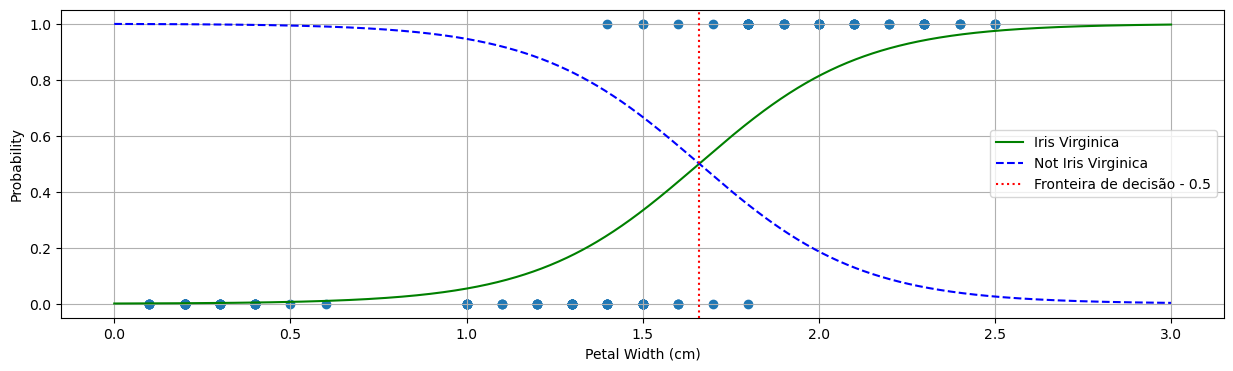

In [26]:
from sklearn import datasets

iris = datasets.load_iris() #dataset do Sklearn

X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(int)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

x_novo = np.linspace(0, 3, 1000).reshape(-1,1)#criando novo conjunto para teste
y_proba = log_reg.predict_proba(x_novo)#modelo de regressão logística usa o método precict_proba()

#fazendo a subtração de valores modulares para poder encontrar o valor mínimo (menor diff) que seria nossa intersecção das retas (fronteira de decisão)
diff = np.abs(y_proba[:, 0] - y_proba[:, 1])
equal_prob_index = np.argmin(diff) #pegar o menor valor, sendo 0 já que o menor valor será a intersecção (onde ambos são iguais)
x_equal_prob = x_novo[equal_prob_index] #intersecção das fronteiras de decisão de cada label

plt.figure(figsize=(15,4))
plt.plot(x_novo, y_proba[:, 1], 'g-', label = 'Iris Virginica')
plt.plot(x_novo, y_proba[:, 0], 'b--', label = 'Not Iris Virginica')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Probability')
plt.axvline(x_equal_prob, linestyle=':', color='r', label = 'Fronteira de decisão - 0.5')
plt.scatter(X, y)
plt.grid(True)
plt.legend()
plt.show()

#### Softmax

In [27]:
X = iris['data'][: , (2,3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10) #é preciso aplicar multinomial em multi_class e adiconar o solver lbfgs e controla
# a regularização L2 por C - quanto maior menor o efeito

softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')